In [122]:
#downloading dataset, importing libraries

import pandas as pd

import numpy as np

import os

import matplotlib.pyplot as plt

import seaborn as sns

import sys
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [123]:
#reading the dataset, deleting missing value entries
df = pd.read_csv('insurance.csv')



df.head()

df.dropna()



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [124]:
#displaying columns
df.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [125]:
#encoding and selecting features
enc = OrdinalEncoder()


df[['sex', 'smoker', 'region']] = enc.fit_transform(df[['sex', 'smoker', 'region']])


selected_features = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
display(selected_features)

,age,sex,bmi,children,smoker,region
0,19,0.0,27.900,0,1.0,3.0
1,18,1.0,33.770,1,0.0,2.0
2,28,1.0,33.000,3,0.0,2.0
3,33,1.0,22.705,0,0.0,1.0
4,32,1.0,28.880,0,0.0,1.0
...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0
1334,18,0.0,31.920,0,0.0,0.0
1335,18,0.0,36.850,0,0.0,2.0
1336,21,0.0,25.800,0,0.0,3.0


In [126]:
#selecting and scaling X variable (selected features)
scaler = StandardScaler()

X = scaler.fit_transform(selected_features)

In [127]:
# defining y variable

y = df['charges'].values

C:\Users\ideod\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x500 with 0 Axes>

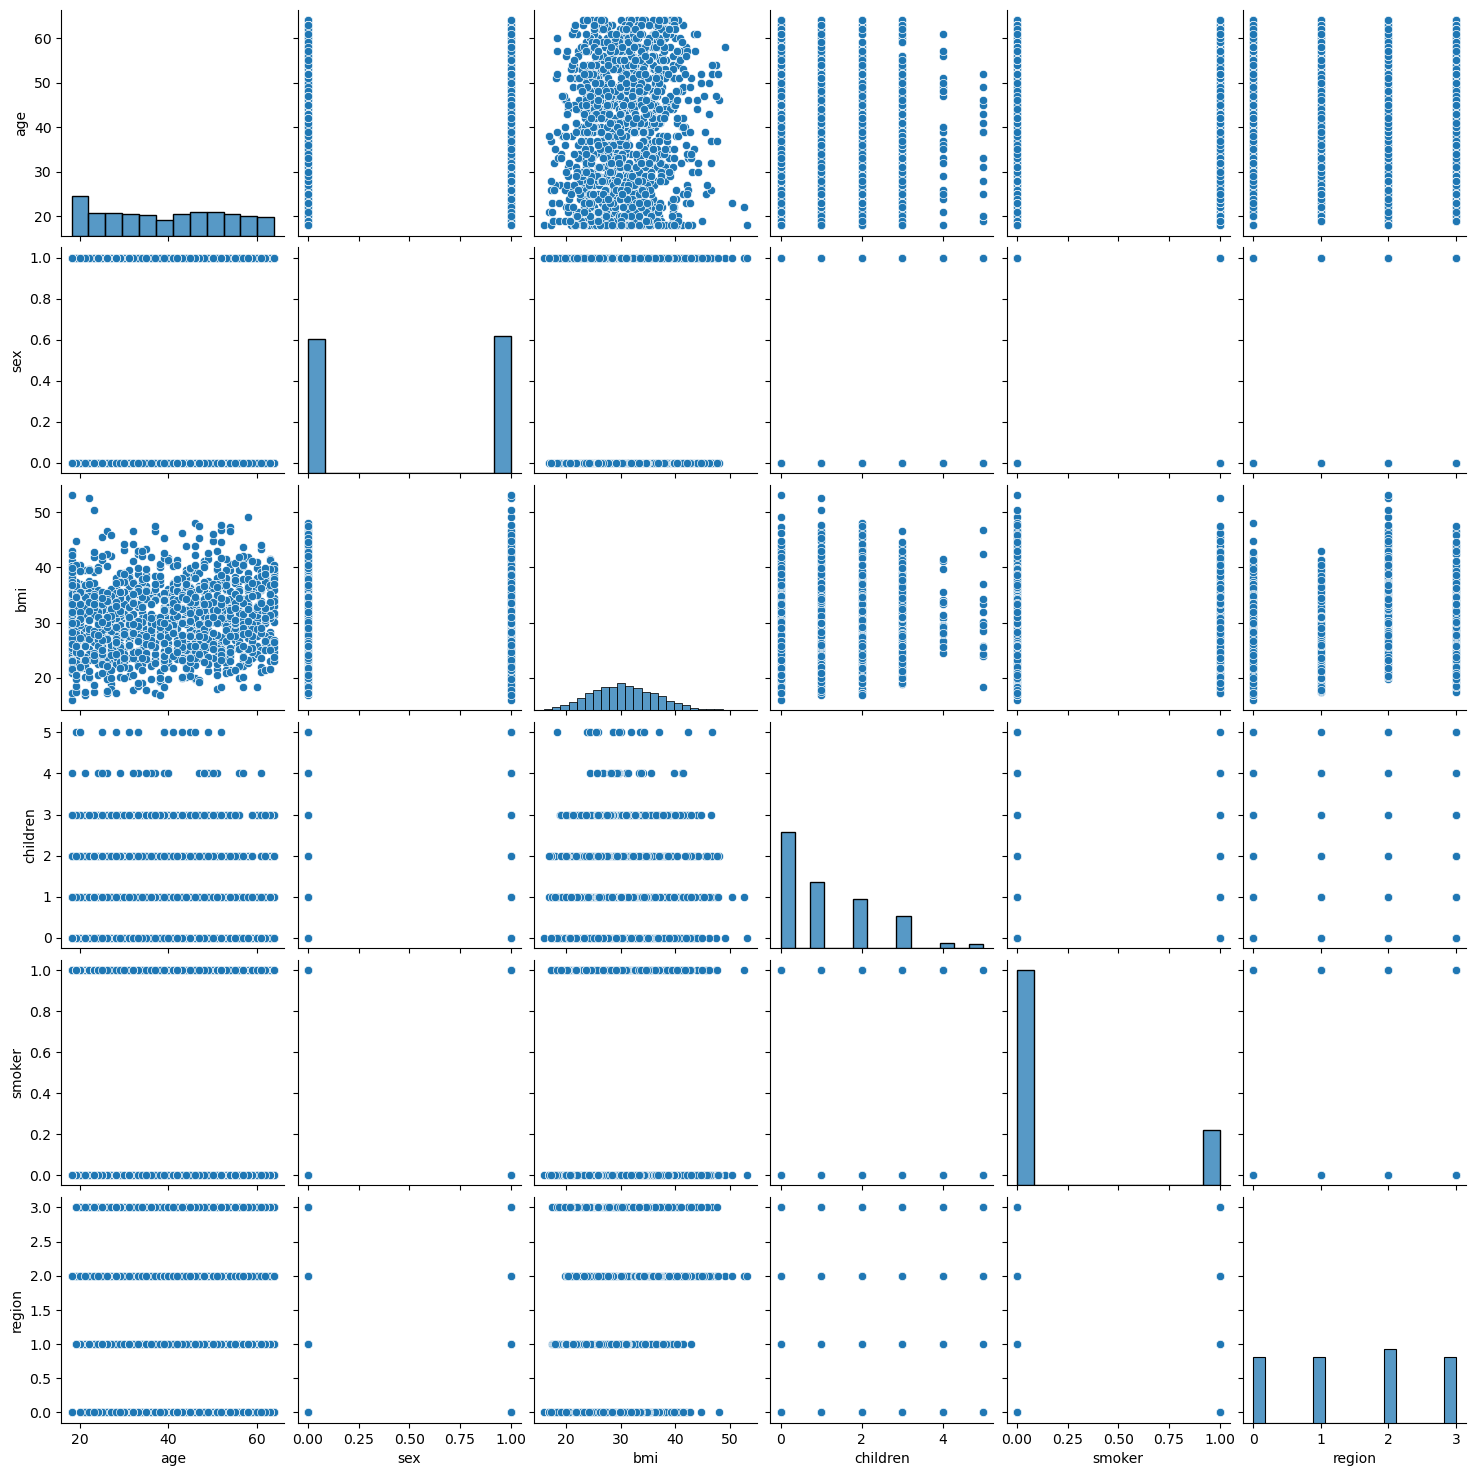

In [128]:
#visualization: pairplot
plt.figure(figsize = (12,5))
sns.pairplot(data = selected_features)

<Axes: >

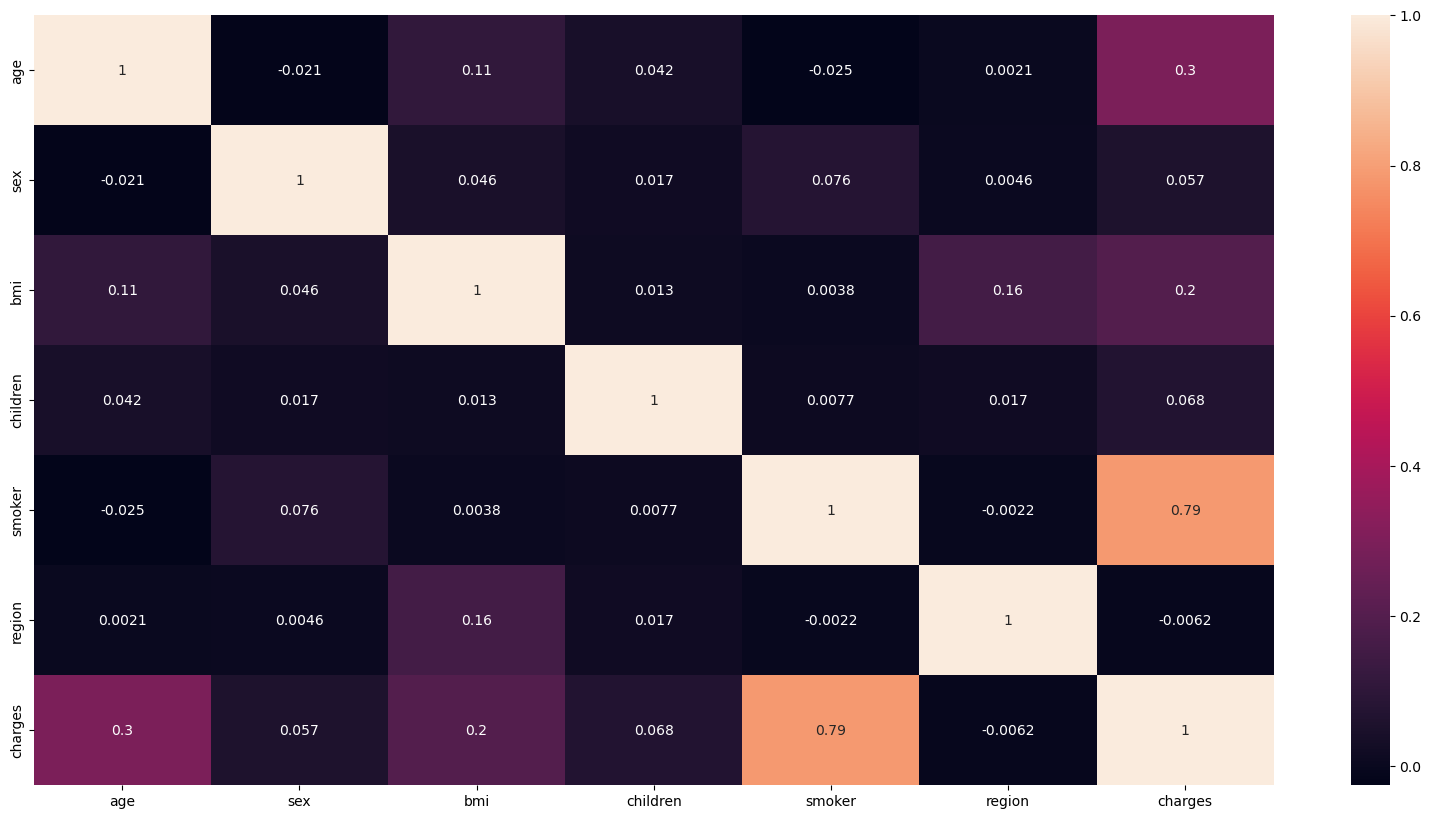

In [129]:
#visualization: correlation heatmap
plt.figure(figsize =(20,10))
sns.heatmap(df.corr(), annot = True)

<Axes: >

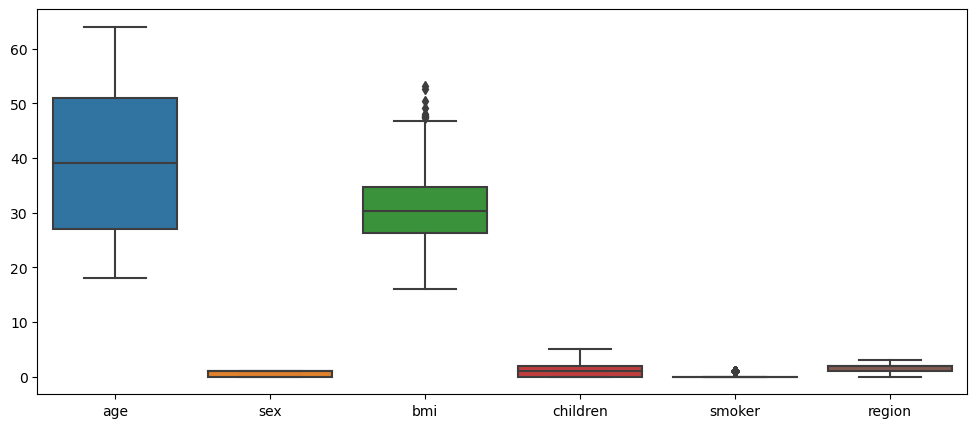

In [130]:
#visualization: box plots of selected features
plt.figure(figsize = (12,5))
sns.boxplot(data = selected_features)

<Axes: >

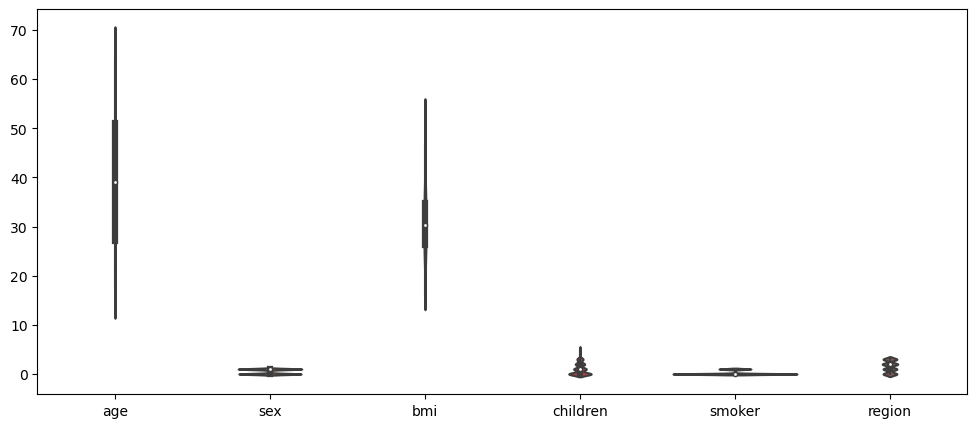

In [131]:
#visualization: violin plots
plt.figure(figsize = (12,5))
sns.violinplot(data= selected_features)

In [132]:
#creating a split (train/test)
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=45)


#creating a split (train/val)

X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=45)

# now the train/validate/test split will be 80%/10%/10%

In [133]:
#training Decision Tree Regressor model for 3 different criteria
#calculating MSE, MAE and R squared scores for each criteria
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
DTRscore = []
for i in ['friedman_mse', 'squared_error', 'poisson']:

    regressor = DecisionTreeRegressor(random_state =0, criterion = i)
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    DTRscore.append(regressor.score(X_test,y_test))
    
    print("MAE: " + str(mean_absolute_error(y_test,y_pred)))
    print('mse:'  + str(mean_squared_error(y_test,y_pred)))

    print (DTRscore)

MAE: 2860.602824029851
mse:39827146.74271881
[0.7495366050941725]
MAE: 2770.0412512686576
mse:38400818.66652093
[0.7495366050941725, 0.7585064410335078]
MAE: 2454.064177910448
mse:33083351.380579237
[0.7495366050941725, 0.7585064410335078, 0.7919467202817599]


<function matplotlib.pyplot.show(close=None, block=None)>

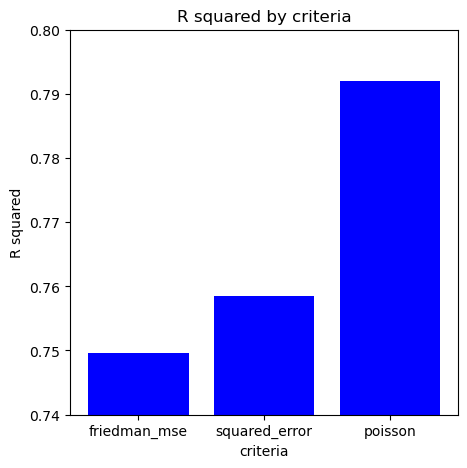

In [134]:
#plotting R squared scores for all the Decision Tree Criteria
criteria = ['friedman_mse', 'squared_error', 'poisson']

fig = plt.figure(figsize= (5,5))
plt.bar(criteria, DTRscore, color = 'blue')
plt.xlabel("criteria")
plt.ylabel("R squared")
plt.title("R squared by criteria")
plt.ylim(0.74,0.80)

plt.show

In [135]:
#decision tree criteria optimal criterion.

print ("Based on the above visualization, the 'poisson' criterion will offer optimal solution")

Based on the above visualization, the 'poisson' criterion will offer optimal solution


In [136]:
#training SVR model for 4 different kernels
#calculating MSE, MAE and R squared scores for each kernel
from sklearn.svm import SVR
score1 = []
for k in ['linear', 'poly', 'rbf', 'sigmoid']:

    svr_model = SVR(kernel = k, gamma ='auto', C =100, epsilon = 0.1)
    svr_model.fit(X_train,y_train)
    y_pred1 = svr_model.predict(X_test)
    score1.append (svr_model.score(X_test,y_test))
                   
  
    print('mse:'  + str(mean_squared_error(y_test,y_pred1)))
    print("MAE: " + str(mean_absolute_error(y_test,y_pred1)))

    print (score1)

mse:54815330.15473263
MAE: 4182.016378059973
[0.6552795064098311]
mse:86163650.79080372
MAE: 5375.836543354532
[0.6552795064098311, 0.4581374198368783]
mse:123606909.75117092
MAE: 6050.290553074346
[0.6552795064098311, 0.4581374198368783, 0.22266572471058543]
mse:84158747.20683336
MAE: 4586.699524796222
[0.6552795064098311, 0.4581374198368783, 0.22266572471058543, 0.4707457786867846]


<function matplotlib.pyplot.show(close=None, block=None)>

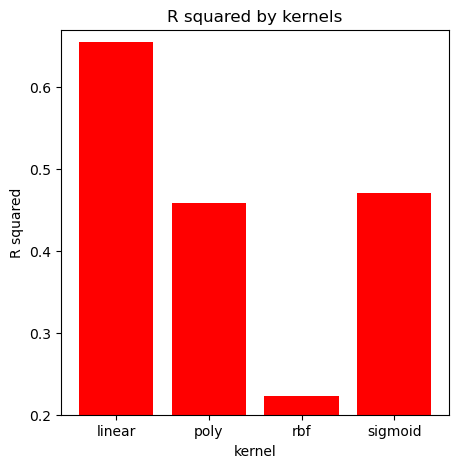

In [137]:
#plotting R squared scores for all the SVR kernels
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

fig = plt.figure(figsize= (5,5))
plt.bar(kernel, score1, color = 'red')
plt.xlabel("kernel")
plt.ylabel("R squared")
plt.title("R squared by kernels")
plt.ylim(0.20,0.67)

plt.show

In [138]:
#SVR optimal kernel.

print ("Based on the above visualization, the 'linear' kernel will offer optimal solution")

Based on the above visualization, the 'linear' kernel will offer optimal solution


In [139]:
#training Random Forest Regressor to FIND optimal value

# PLEASE NOTE: the test range for n_estimators i.e. 290 - 300 has been obtained after intensive testing from 200-500 estimators

from sklearn.ensemble import RandomForestRegressor
score2 = []

for k in range (290,300):
    optRFR = RandomForestRegressor(n_estimators = k, random_state = 0)
    optRFR = optRFR.fit(X_train, y_train)
    y_predOPT = optRFR.predict(X_test)
    score2.append(optRFR.score(X_test, y_test))
  


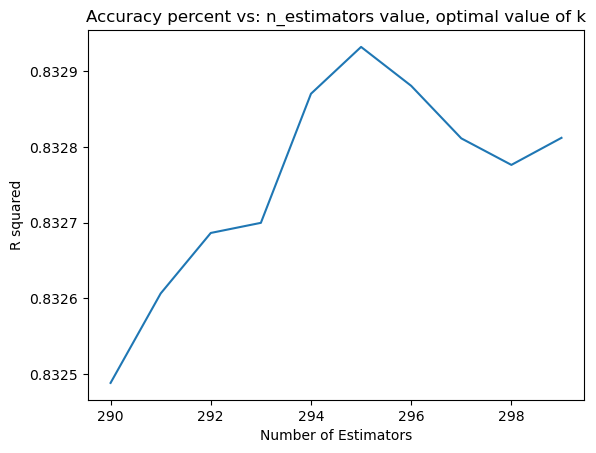

In [140]:
#plotting accuracy percentage vs n_estimators (testing)(Random Forest Model)


plt.plot(range(290,300), score2)
plt.title("Accuracy percent vs: n_estimators value, optimal value of k")
plt.xlabel("Number of Estimators")
plt.ylabel("R squared")

plt.show()

In [141]:
max (score2)

0.8329318934603134

In [142]:
#to train the Random Forest Regressor for optimal value obtained above


RFR = RandomForestRegressor(n_estimators = 295, random_state = 0)
RFR.fit(X_train, y_train)
scoreRFR = RFR.score(X_test, y_test)
y_pred2 = RFR.predict(X_test)

print('mse:'  + str(mean_squared_error(y_test,y_pred2)))
print("MAE: " + str(mean_absolute_error(y_test,y_pred2)))

print (scoreRFR)



mse:26566141.522141714
MAE: 2755.20550948482
0.8329318934603134


In [143]:
# plotting scores for all models (3 criteria for DTC and 4 kernels for RVR) tested above for comparison
models = ['RFR','DTR(friedman_mse)', 'DTR(squared_error)', 'DTR(poisson)', 'SVR(linear)','SVR(poly)', 'SVR(rbf)', 'SVR(sigmoid)']

maxscores = [scoreRFR]
maxscores.extend(DTRscore)
maxscores.extend(score1)


<function matplotlib.pyplot.show(close=None, block=None)>

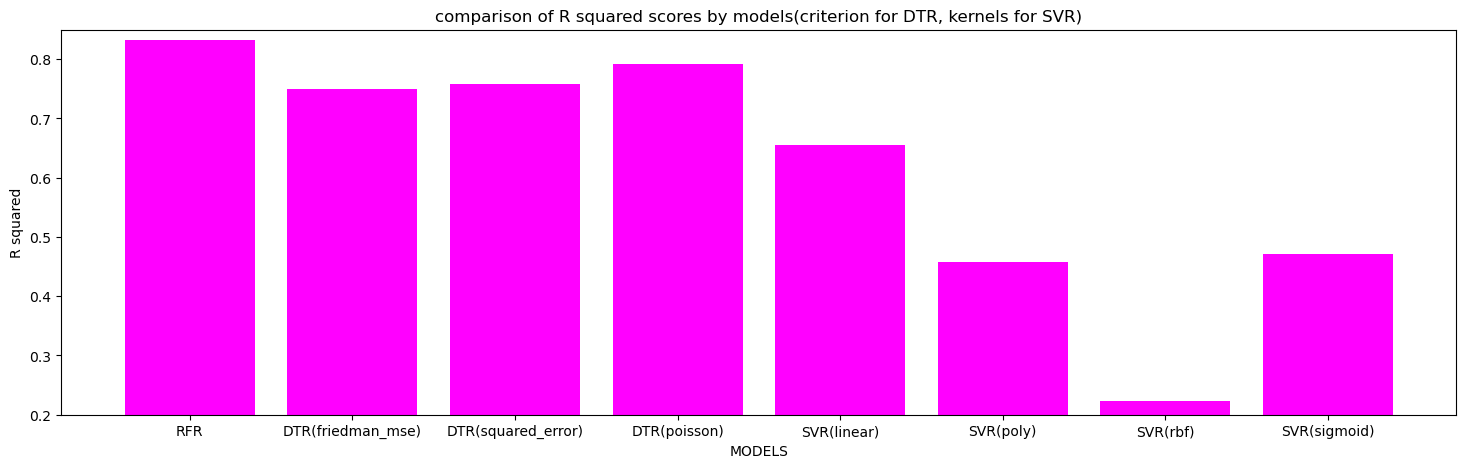

In [144]:
#comparison of R squared scores by models
fig = plt.figure(figsize= (18,5))
plt.bar(models, maxscores, color = 'magenta')
plt.xlabel("MODELS")
plt.ylabel("R squared")
plt.title("comparison of R squared scores by models(criterion for DTR, kernels for SVR)")
plt.ylim(0.2,0.85)

plt.show

In [145]:
# to get the maximum of all scores
max (maxscores)

0.8329318934603134

In [147]:
#final conclusion
print ("Based on the scores of the above models, Random Forest Regression gives the highest score of 83.29% ")
print ("The score also meets the required standard of 82%")

Based on the scores of the above models, Random Forest Regression gives the highest score of 83.29% 
The score also meets the required standard of 82%
